In [18]:
import spatialproteomics as sp
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d
import pandas as pd


In [19]:
image_2_4 = imread("/dss/dsshome1/00/ge65tib2/2-4__HE__histo.ome.tif")
image_5_5 = imread("/dss/dsshome1/00/ge65tib2/5-5__HE__histo.ome.tif")

image_2_4.shape
image_5_5.shape

image_2_4 = image_2_4.transpose(2, 0, 1)
image_2_4.shape

image_5_5 = image_5_5.transpose(2, 0, 1)
image_5_5.shape

(40, 2792, 3084)

In [20]:
markers = ['DAPI', 'SOX2', 'FAP', 'cxcr3', 'LRRC15', 'CD20', 'CD68', 'CD45RO', 'CD31', 'PD-1', 'Ki67', 'Keratin 5', 'CD4', 'IFNG', 'SMA', 'CD66', 'Podoplanin', 'CXCR4', 'PGRN', 'Granzyme B', 'Pan-Cytokeratin', 'MARCO', 'CD56', 'HAS1', 'CD107a', 'b-Catenin1', 'HLA-A', 'HLA-DR', 'CD8', 'PDL1', 'TP63', 'GATA6', 'CD34', 'TCF-1', 'Bcl-2', 'PCNA', 'CLDN18', 'CD3e', 'MCT4', 'LAG3']
sp_object_2_4 = sp.load_image_data(image_2_4, channel_coords=markers)
sp_object_5_5 = sp.load_image_data(image_5_5, channel_coords=markers)



In [21]:
sp_object_2_4

<xarray.Dataset> Size: 265MB
Dimensions:   (channels: 40, y: 2501, x: 2644)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 20kB 0 1 2 3 4 5 6 ... 2495 2496 2497 2498 2499 2500
  * x         (x) int64 21kB 0 1 2 3 4 5 6 ... 2638 2639 2640 2641 2642 2643
Data variables:
    _image    (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 2 2 ... 3 2 1 2 2 1 1 1

In [22]:
sp_object_5_5

<xarray.Dataset> Size: 344MB
Dimensions:   (channels: 40, y: 2792, x: 3084)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 22kB 0 1 2 3 4 5 6 ... 2786 2787 2788 2789 2790 2791
  * x         (x) int64 25kB 0 1 2 3 4 5 6 ... 3078 3079 3080 3081 3082 3083
Data variables:
    _image    (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 2 1 ... 2 2 1 2 2 2 2 2

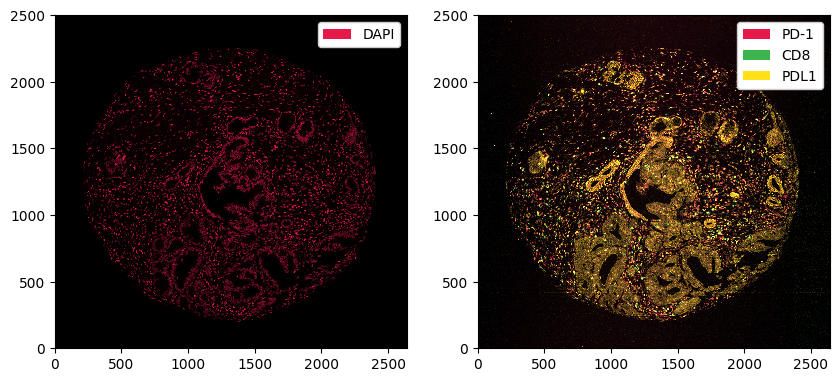

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_2_4.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_2_4.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])


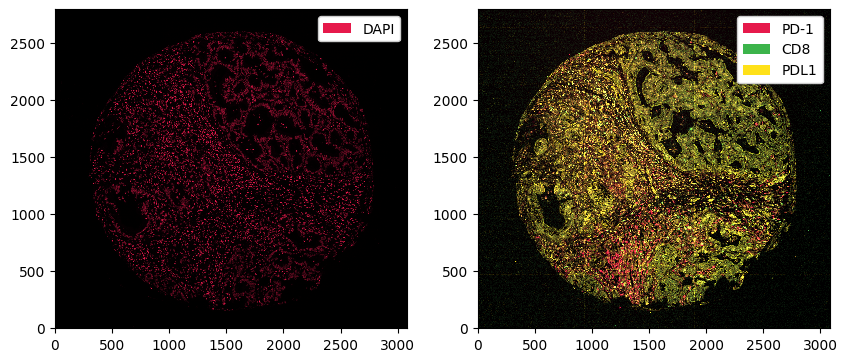

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_5_5.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_5_5.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])

In [25]:
ds_cellpose_2_4 = sp_object_2_4.tl.cellpose(channel="DAPI", model_type='nuclei', flow_threshold=0.6)

** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [26]:
ds_cellpose_5_5 = sp_object_5_5.tl.cellpose(channel="DAPI", model_type='nuclei', flow_threshold=0.6)


** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [27]:
ds_cellpose_5_5

<xarray.Dataset> Size: 362MB
Dimensions:        (channels: 40, y: 2792, x: 3084, cells: 10827, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 22kB 0 1 2 3 4 5 ... 2786 2787 2788 2789 2790 2791
  * x              (x) int64 25kB 0 1 2 3 4 5 ... 3078 3079 3080 3081 3082 3083
  * cells          (cells) int64 87kB 1 2 3 4 5 ... 10824 10825 10826 10827
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 ... 2 1 2 2 2 2 2
    _segmentation  (y, x) uint16 17MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 173kB 153.6 1.484e+03 ... 1.654e+03

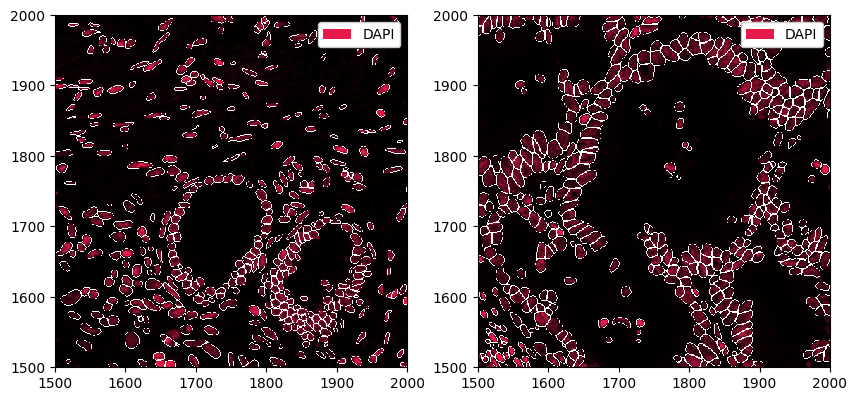

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# pp[100:200, 100:200] zoom in
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1])


In [29]:
ds_cellpose_2_4 = ds_cellpose_2_4.pp.add_quantification(func="intensity_mean")
ds_cellpose_5_5 = ds_cellpose_5_5.pp.add_quantification(func="intensity_mean")

In [30]:
ds_cellpose_2_4

<xarray.Dataset> Size: 280MB
Dimensions:        (channels: 40, y: 2501, x: 2644, cells: 7153, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 20kB 0 1 2 3 4 5 ... 2495 2496 2497 2498 2499 2500
  * x              (x) int64 21kB 0 1 2 3 4 5 ... 2638 2639 2640 2641 2642 2643
  * cells          (cells) int64 57kB 1 2 3 4 5 6 ... 7149 7150 7151 7152 7153
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 ... 2 1 2 2 1 1 1
    _segmentation  (y, x) uint16 13MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 114kB 62.72 1.457e+03 ... 1.027e+03
    _intensity     (cells, channels) float64 2MB 2.484 5.828 ... 2.135 175.3

In [ ]:
help(sp_object.pp.transform_expression_matrix)

Help on method transform_expression_matrix in module spatialproteomics.pp.preprocessing:

transform_expression_matrix(method: str = 'arcsinh', key: str = '_intensity', key_added: str = '_intensity', cofactor: float = 5.0, min_percentile: float = 1.0, max_percentile: float = 99.0, **kwargs) method of spatialproteomics.pp.preprocessing.PreprocessingAccessor instance
    Transforms the expression matrix based on the specified mode.
    
    Parameters:
        method (str): The transformation method. Available options are "arcsinh", "zscore", "minmax", "double_zscore", and "clip".
        key (str): The key of the expression matrix in the object.
        key_added (str): The key to assign to the transformed matrix in the object.
        cofactor (float): The cofactor to use for the "arcsinh" transformation.
        min_percentile (float): The minimum percentile value to use for the "clip" transformation.
        max_percentile (float): The maximum percentile value to use for the "clip" tr

In [31]:
# putting the expression matrix into an anndata object
adata = ds_cellpose_2_4.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Scimap/2_4_ds_cellpose.h5ad")


In [32]:
# putting the expression matrix into an anndata object
adata_1 = ds_cellpose_5_5.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata_1
adata_1.write("/dss/dsshome1/00/ge65tib2/Scimap/5_5_ds_cellpose.h5ad")


In [33]:
print(adata)
print(adata.shape)

AnnData object with n_obs × n_vars = 7153 × 40
    obs: 'centroid-0', 'centroid-1'
    obsm: 'spatial'
(7153, 40)
